In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#import input and output files
#input
input_file = 'C:\\Users\\hanne\\Documents\\Erasmus\\IE582\\hw1\\hw1_input.csv'
input = np.loadtxt(input_file, delimiter=',', skiprows=1)
#output real
output_real_file = 'C:\\Users\\hanne\\Documents\\Erasmus\\IE582\\hw1\\hw1_real.csv'
output_real = np.loadtxt(output_real_file, delimiter=',', skiprows=1)
#output imaginary
output_img_file = 'C:\\Users\\hanne\\Documents\\Erasmus\\IE582\\hw1\\hw1_img.csv'
output_img = np.loadtxt(output_img_file, delimiter=',', skiprows=1)

In [3]:
#not important, info about array shapes
print(np.shape(input),np.shape(output_real),np.shape(output_img))

(385, 11) (385, 201) (385, 201)


In [4]:
#calculate the absolute output value --> for plotting the magnitude
abs = (output_real**2 + output_img**2)**0.5

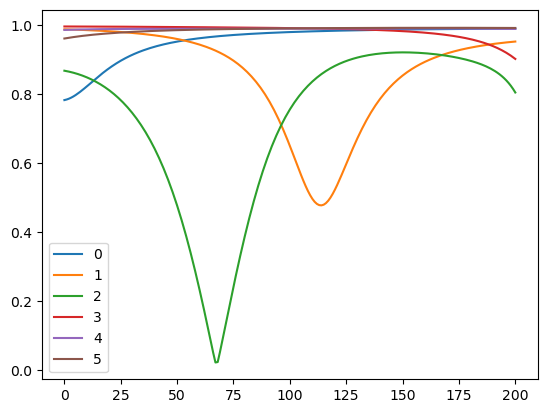

In [5]:
#plot the magnitudes (y-axis) for (all) designs (colors) and all frequencies (x-axis)
frequencies = np.arange(0,201,1)
for i in range(0,6): #for all: range(0,385)
    plt.plot(frequencies,abs[i], label=i)
plt.legend()
#plt.plot(frequencies,abs[138], 'bo') #minimal Magnitude at index 138

plt.show()

In [6]:
## not important, lowest magnitude (global minimum) in abs[138]
glob_min = np.min(abs)
minima = abs.min(axis=1)
for i in range(0,385):
    if minima[i] == glob_min:
        print(i)

138


In [7]:
#not important, testing
print('minimum: ', np.min(abs[0]), '\nindex von minimum: ', np.argmin(abs[0]))
print(abs[0,np.argmin(abs[0])])

minimum:  0.7817780840039179 
index von minimum:  0
0.7817780840039179


In [8]:
#not important, testing
glob_min_idx = np.argmin(abs)
print(glob_min_idx)
lok_min_idx = np.argmin(abs[138])
print(lok_min_idx)
print(138*201+71)

27809
71
27809


In [9]:
#get the index of the minimum magnitude for each row of absolute values
min_each_row = np.argmin(abs, axis=1)

In [10]:
#find mode of minimal values --> frequency level 200 is most common (but not necessarily a 'peak' --> see earlier plot)
mode = stats.mode(min_each_row)
print(mode)

ModeResult(mode=200, count=77)


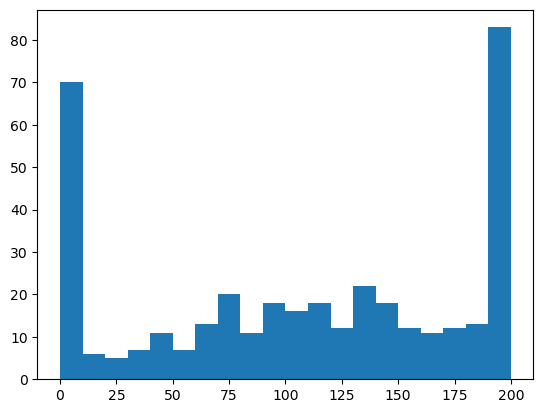

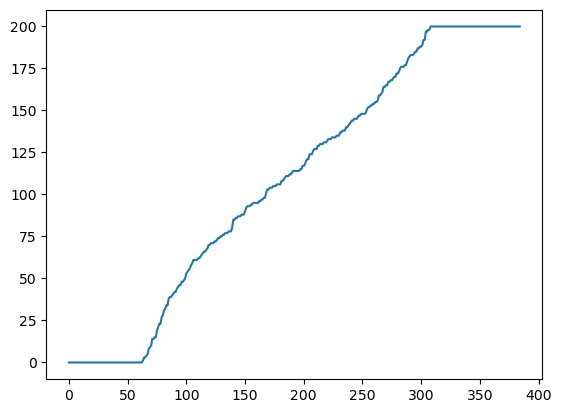

In [11]:
#plotting to find out important frequencies
plt.hist(min_each_row, bins = 20)
plt.show()
min_sorted = np.sort(min_each_row)
plt.plot(min_sorted)
plt.show()

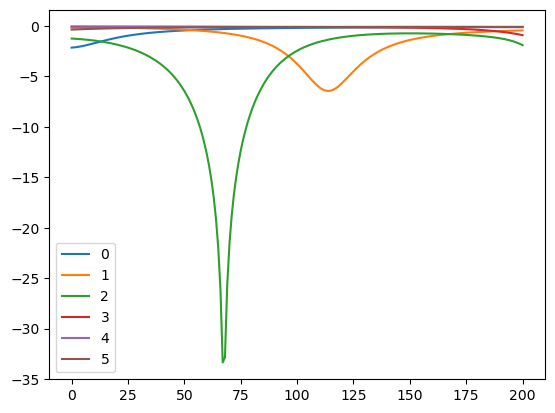

In [12]:
s11_db = 20*np.log10(abs)

frequencies = np.arange(0,201,1)
for i in range(0,6): #for all: range(0,385)
    plt.plot(frequencies,s11_db[i], label=i)
plt.legend()
#plt.plot(frequencies,abs[138], 'bo') #minimal Magnitude at index 138

plt.show()

In [13]:
min_idx_each_row = np.argmin(s11_db, axis=1)
min_each_row = np.min(s11_db, axis=1)

min_lowest = np.sort(min_each_row)[:10]
min_idx_lowest = np.argsort(min_each_row)[:10]
#print(min_lowest,min_idx_lowest)

min_col_idx = min_idx_each_row[min_idx_lowest]
lowest = list(zip(min_idx_lowest,min_col_idx,min_lowest))

#print 10 lowest s11 values in db and for which design (row) and frequency (column) they occured 
for row_index,col_index,value in lowest:
    print(f'The lowest S11 value for design {row_index} is {value:.2f} db at frequency level {col_index}')

#for i in range(len(min_col_idx)):
#    print(s11_db[min_idx_lowest[i],min_col_idx[i]])

The lowest S11 value for design 138 is -45.00 db at frequency level 71
The lowest S11 value for design 16 is -41.64 db at frequency level 28
The lowest S11 value for design 26 is -39.53 db at frequency level 27
The lowest S11 value for design 276 is -37.81 db at frequency level 126
The lowest S11 value for design 129 is -35.93 db at frequency level 155
The lowest S11 value for design 92 is -35.07 db at frequency level 85
The lowest S11 value for design 371 is -34.86 db at frequency level 88
The lowest S11 value for design 342 is -34.66 db at frequency level 55
The lowest S11 value for design 176 is -34.15 db at frequency level 172
The lowest S11 value for design 2 is -33.36 db at frequency level 67


In [14]:
test = np.reshape(abs,-1)
np.shape(test)

(77385,)

In [15]:
out_test = np.random.rand(385,201)
print(np.shape(out_test))
out_test_flat = out_test.reshape(385,-1)
print(np.shape(out_test_flat))

(385, 201)
(385, 201)


In [16]:
#import tools for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
#first PCA according to ChatGpt, this does not seem right yet (components should not be frequencies but design parameters)

#import Scaler for standardization
scaler = StandardScaler()

#standardize outputs
out_real_scaled = scaler.fit_transform(output_real)
out_img_scaled = scaler.fit_transform(output_img)


#PCA
pca = PCA(n_components = 5)
principal_components = pca.fit_transform(out_real_scaled)


print(pca.explained_variance_ratio_)
print(principal_components)
print(np.shape(principal_components))

[0.85212814 0.05378176 0.04539723 0.0238369  0.01018758]
[[-11.68749792   1.81062544  -2.84461505   3.93548911  -3.28939547]
 [ -2.86295515   6.35296736   7.41279751  -1.5408893   -1.34365237]
 [ 18.17749812  -6.23947231   0.15476208   2.32439226  -0.12754181]
 ...
 [-13.9616664   -0.23185692   0.08669727  -0.12847241   0.03420584]
 [ -0.5228717    4.09404821  10.1384806    0.67758467  -0.17930323]
 [ 11.0648998    2.9270368   -6.62990049  -1.76799222   0.41897931]]
(385, 5)


In [18]:
#scale input
input_scaled = scaler.fit_transform(input)
#pca
pca_input = PCA(n_components = 9) #variance above 0.9 for 9 components
principal_comp_input = pca_input.fit_transform(input_scaled)

print(pca_input.explained_variance_ratio_)
print(sum(pca_input.explained_variance_ratio_))

loadings = pd.DataFrame(pca_input.components_, columns = pd.DataFrame(input).columns)
loadings

[0.20715348 0.11070825 0.10003384 0.09607237 0.09187079 0.08845826
 0.08565904 0.08165053 0.07339863]
0.9350051899891598


,0,1,2,3,4,5,6,7,8,9,10
0,-0.101327,0.624178,0.071054,0.624137,-0.021049,0.025997,-0.054228,-0.018720,0.039213,0.445100,0.038422
1,-0.315409,0.009718,-0.055716,-0.018824,-0.266259,-0.002815,0.265990,0.559499,-0.564753,0.012829,0.350944
2,-0.369645,0.040766,0.620460,0.016441,0.086417,0.548381,0.144827,0.088323,0.093131,-0.256167,-0.255339
3,0.376883,0.039631,0.392974,0.076518,0.510652,-0.454397,0.177533,0.373926,-0.151004,-0.022492,-0.184975
4,-0.409833,-0.012169,-0.017701,-0.028012,0.124629,-0.218986,-0.580059,-0.127759,-0.487544,-0.012254,-0.420314
5,0.073314,-0.032326,0.069714,-0.060565,0.459841,0.304908,-0.547579,0.172140,0.016285,0.027772,0.591708
6,-0.253331,0.000413,-0.490098,0.002837,0.647199,0.212779,0.429976,-0.138146,-0.102528,0.097290,-0.086813
7,-0.454266,-0.022090,0.317943,-0.059481,0.110408,-0.491478,0.174386,-0.415883,0.129279,-0.053226,0.460296
8,-0.406238,-0.040157,-0.216559,-0.038186,0.040184,-0.240280,-0.140321,0.548589,0.618694,0.031927,-0.145645


In [19]:
#standardize outputs
out_abs_scaled = scaler.fit_transform(abs)


#PCA
pca_abs = PCA(n_components = 4)
principal_components_abs = pca_abs.fit_transform(out_abs_scaled)


print(pca_abs.explained_variance_ratio_)
print(principal_components_abs)
print(sum(pca_abs.explained_variance_ratio_))

[0.60013561 0.12227894 0.11380723 0.07500046]
[[ -7.56266672   2.78274765  -0.84038624   3.80047894]
 [ -2.14635354  -6.49953693   4.54795049   0.9806068 ]
 [  7.22787754  10.00049382   6.72728362  -3.2297572 ]
 ...
 [-10.48089185   0.29281032  -0.22084907   0.226544  ]
 [ -1.65841039  -6.87185128   1.61587554   1.02490285]
 [ 12.26482715  -2.67133993   4.20530312   4.97575391]]
0.911222253906963


In [20]:
#dataframe aus pca-output, vier spalten
#correlation zwischen input-design-parametern und principal components

pca_dataframe = pd.DataFrame(principal_components_abs, columns=['PC1','PC2','PC3','PC4'])

input_df = pd.DataFrame(input)

corr_matrix = input_df.corrwith(pca_dataframe['PC1']).to_frame(name='PC1_corr')
corr_matrix['PC2_corr'] = input_df.corrwith(pca_dataframe['PC2'])
corr_matrix['PC3_corr'] = input_df.corrwith(pca_dataframe['PC3'])
corr_matrix['PC4_corr'] = input_df.corrwith(pca_dataframe['PC4'])
corr_matrix

,PC1_corr,PC2_corr,PC3_corr,PC4_corr
0,-0.090296,0.076842,-0.089372,-0.098412
1,0.908197,-0.030550,0.104090,-0.065287
2,0.076652,-0.016331,-0.010047,0.031033
3,0.947118,-0.042610,0.086442,-0.045344
4,0.002365,0.013754,-0.007540,0.018887
5,0.062912,0.025536,-0.051885,-0.055900
6,-0.057352,0.020950,0.067132,0.009092
7,-0.052712,-0.041817,0.000398,-0.031097
8,0.062925,0.082535,-0.031536,0.051622
9,0.465894,0.173906,0.056458,-0.021205


In [21]:
#not important, print mean and std of scaled and not scaled output
print('mean and std of scaled, all: ', np.mean(out_real_scaled), np.std(out_real_scaled))
print('mean and std of scaled, first column: ', np.mean(out_real_scaled[:,0]), np.std(out_real_scaled[:,0]))

print('\nmean and std of not scaled, all: ', np.mean(output_real), np.std(output_real))

mean and std of scaled, all:  0.0 1.0
mean and std of scaled, first column:  -3.229739708000455e-17 1.0

mean and std of not scaled, all:  -0.2619114963391661 0.6725927326311123


In [22]:
#not important, print mean and std of scaled and not scaled output
print('mean and std of scaled, all: ', np.mean(out_img_scaled), np.std(out_img_scaled))
print('mean and std of scaled, first column: ', np.mean(out_img_scaled[:,0]), np.std(out_img_scaled[:,0]))

print('\nmean and std of not scaled, all: ', np.mean(output_img), np.std(output_img))

mean and std of scaled, all:  9.843016252953769e-17 1.0
mean and std of scaled, first column:  6.644035970743794e-16 1.0

mean and std of not scaled, all:  0.31018452379262584 0.3462151335987727


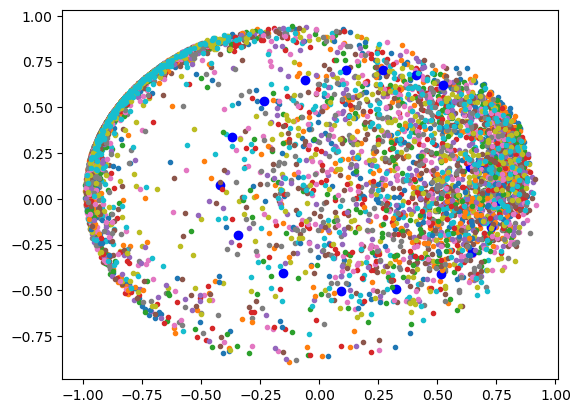

In [23]:
#not important, real (x) and imaginary (y) part of output for every 10th frequency

#for i in range(0,201):
#    plt.plot(output_real[i,:100], output_img[i,:100],'.')
for i in range(0,20):
    plt.plot(output_real[:,10*i], output_img[:,10*i],'.')
    plt.plot(output_real[384,10*i],output_img[384,10*i],'bo')
plt.show()

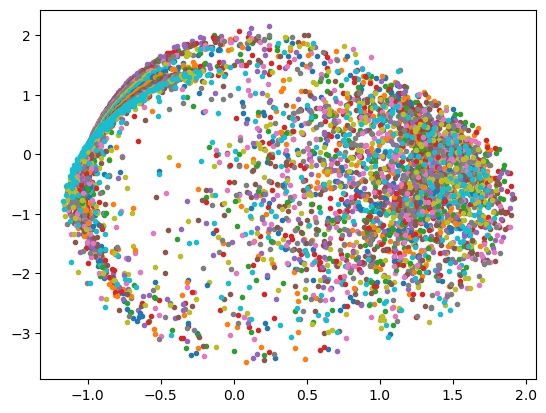

In [24]:
#not important, real (x) and imaginary (y) part of output for every 10th frequency, SCALED

for i in range(0,20):
    plt.plot(out_real_scaled[:,10*i], out_img_scaled[:,10*i],'.')
plt.show()

In [25]:
#might be important, ChatGPT inspired, combining in- and output to one array (input columns first, then output)

combined = pd.concat([pd.DataFrame(input), pd.DataFrame(output_real)], axis=1)
print(combined.shape)
comb_np = np.array(combined)
print(comb_np[:,11:])

(385, 212)
[[ 0.64947141  0.60862284  0.5637705  ... -0.8869506  -0.8857185
  -0.884482  ]
 [-0.68444301 -0.6809262  -0.67735451 ... -0.81334618 -0.81007849
  -0.80678224]
 [ 0.67019448  0.67818304  0.68588579 ...  0.54386959  0.51679585
   0.48813927]
 ...
 [-0.98588735 -0.98610892 -0.98629043 ... -0.82178098 -0.82033806
  -0.81888614]
 [-0.69627025 -0.69248782 -0.68864473 ... -0.90543878 -0.90472794
  -0.90389568]
 [ 0.68925811  0.68169315  0.67431202 ...  0.60511172  0.61421885
   0.6231432 ]]


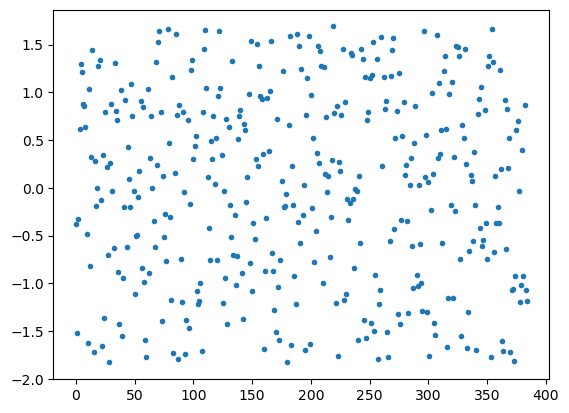

Component1: mean: 0.0000, std: 1.0000
Component2: mean: -0.0000, std: 1.0000
Component3: mean: -0.0000, std: 1.0000
Component4: mean: 0.0000, std: 1.0000
Component5: mean: 0.0000, std: 1.0000
Component6: mean: -0.0000, std: 1.0000
Component7: mean: 0.0000, std: 1.0000
Component8: mean: -0.0000, std: 1.0000
Component9: mean: 0.0000, std: 1.0000
Component10: mean: 0.0000, std: 1.0000
Component11: mean: -0.0000, std: 1.0000
mean: -3.5233524087277696e-16, std: 1.0


In [26]:
#not important, plotting scaled input for some of the design parameters
# printing mean and std for all columns of input

for i in range(0,1):
    plt.plot(input_scaled[:,i],'.')
plt.show()
for i in range(0,len(input_scaled[0])):
    mean = np.mean(input_scaled[:,i])
    std = np.std(input_scaled[:,i])
    print(f'Component{i+1}: mean: {mean:.4f}, std: {std:.4f}')

print(f'mean: {np.mean(input_scaled)}, std: {np.std(input_scaled)}')

In [27]:
# does not work, just copied from website; for plotting, not adjusted for this problem

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

NameError: name 'ax1' is not defined

In [28]:
#create DataFrame
df = pd.DataFrame({'x1': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4],
                   'x2': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4],
                   'y': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90]})

from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[['x1', 'x2']], df.y

#fit regression model
model.fit(X, y)

#display regression coefficients and R-squared value of model
print(model.intercept_, model.coef_, model.score(X, y))


70.48282057040197 [ 5.79452055 -1.15764653] 0.7667425565278788


In [30]:
import statsmodels.api as sm

#define response variable
y = df['y']

#define predictor variables
x = df[['x1', 'x2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     13.15
Date:                Thu, 07 Nov 2024   Prob (F-statistic):            0.00296
Time:                        14:47:32   Log-Likelihood:                -31.191
No. Observations:                  11   AIC:                             68.38
Df Residuals:                       8   BIC:                             69.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4828      3.749     18.803      0.0

C:\Users\hanne\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
y.shape,x.shape

((11,), (11, 3))

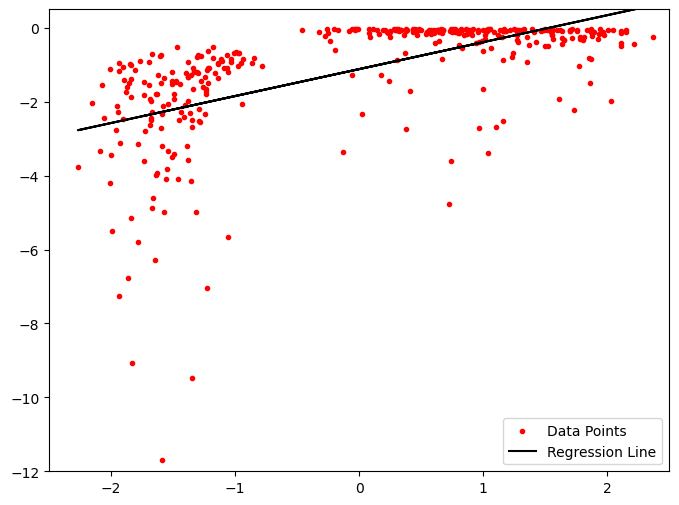

In [87]:
#pca for input --> reduce to one principal comoponent
pca_reg = PCA(n_components=1)
input_reduced = pca_reg.fit_transform(input_df).flatten()

out = s11_db[:,11]
in_with_intercept = sm.add_constant(input_reduced)
model_reg = sm.OLS(out,in_with_intercept)
results = model_reg.fit()
out_pred = results.predict(in_with_intercept)

plt.figure(figsize=(8,6))
plt.scatter(input_reduced, out, color='red', marker='.', label='Data Points')
plt.plot(input_reduced, out_pred,color='black', label='Regression Line')
plt.legend()
plt.xlim(-2.5,2.5)
plt.ylim(-12,0.5)
plt.show()

In [96]:
min_idx_each_row = np.argmin(s11_db, axis=1)
min_each_row = np.min(s11_db, axis=1)

num_frequencies = 10

min_lowest = np.sort(min_each_row)[:num_frequencies]
min_idx_lowest = np.argsort(min_each_row)[:num_frequencies]
#print(min_lowest,min_idx_lowest)

min_col_idx = min_idx_each_row[min_idx_lowest]
lowest = list(zip(min_idx_lowest,min_col_idx,min_lowest))

#prepare output for regression, only frequencies/columns with lowest magnitude
s11_reduced = s11_db[:,min_col_idx]

In [100]:
len(s11_reduced[0])

10

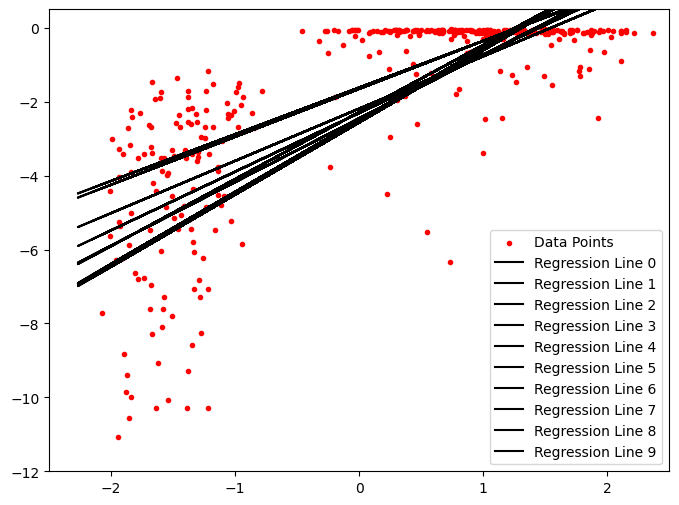

In [110]:
#pca for input --> reduce to one principal comoponent
pca_reg = PCA(n_components=1)
input_reduced = pca_reg.fit_transform(input_df)

plt.figure(figsize=(8,6))

in_with_intercept = sm.add_constant(input_reduced)
plt.scatter(input_reduced[0], out, color='red', marker='.', label='Data Points')

for i in range(len(s11_reduced[0])):
    out = s11_reduced[:,i]
    model_reg = sm.OLS(out,in_with_intercept)
    results = model_reg.fit()
    out_pred = results.predict(in_with_intercept)
    plt.plot(input_reduced, out_pred,color='black', label=f'Regression Line {i}')

plt.legend()
plt.xlim(-2.5,2.5)
plt.ylim(-12,0.5)
plt.show()

In [126]:
pca_reg2 = PCA(n_components=2)
input_reduced2 = pca_reg2.fit_transform(input_df)

input_reduced == input_reduced2[:,1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,